In [14]:
# layers=2_units=512_dropout=0.0_batch_size=16_activation=tanh

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import pickle

In [15]:
#===================== function ===========================================
# Plot the training and validation accuracy and loss
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    #plt.legend()
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.tight_layout()
    plt.show()

In [16]:
# Параметри моделі
loss_f = 'binary_crossentropy'
metrics = 'accuracy'

df = pd.read_csv('../../data/cleaned_remaining_na_-1.csv') 

X = df.drop(columns=['id', 'churn',"service_failure_count"])
y = df['churn']

# Поділ на тренувальний, тестовий та валідаційний набори
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [17]:
# Нормалізація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
with open('nn1_scaller.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [19]:
batch_size =64
units1 = 128
units2 = 64
activation = 'tanh'
optimizer =  'adam'

# Створення моделі
model = Sequential()
model.add(InputLayer(shape=(X_train_scaled.shape[1],)))
model.add(Dense(units1, activation=activation)) 
model.add(Dropout(0.25)),
model.add(Dense(units2, activation=activation)) 
model.add(Dropout(0.5)),
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=loss_f, optimizer=optimizer, metrics=[metrics])

# Early stopping та learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.000001, patience=5, min_lr=0.000000001)

In [20]:
# Друк інформації про модель
print('---------------------------------------')
print(f"Training model with 2 layers, units: {units1}+{units2}, batch_size: {batch_size}, activation: {activation}")

# Тренування моделі
history = model.fit(
    X_train_scaled, y_train, 
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=batch_size,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
) 


---------------------------------------
Training model with 2 layers, units: 128+64, batch_size: 64, activation: tanh
Epoch 1/50
787/787 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - accuracy: 0.8563 - loss: 0.3727 - val_accuracy: 0.8909 - val_loss: 0.3059 - learning_rate: 0.0010
Epoch 2/50
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - accuracy: 0.8868 - loss: 0.3212 - val_accuracy: 0.9034 - val_loss: 0.2794 - learning_rate: 0.0010
Epoch 3/50
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.8980 - loss: 0.2957 - val_accuracy: 0.9151 - val_loss: 0.2603 - learning_rate: 0.0010
Epoch 4/50
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9030 - loss: 0.2881 - val_accuracy: 0.9156 - val_loss: 0.2600 - learning_rate: 0.0010
Epoch 5/50
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.9120 - loss: 0.2738 - val_accuracy: 0.9239 - val_loss: 0.2426 - learning_rate: 0.0010
Epoch 6/50
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.9134 - loss: 0.2715 - val_accuracy: 0.9261 - v

In [21]:
# Оцінка моделі на тестових даних
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy for model: {accuracy}")

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
Test Accuracy for model: 0.9239614243323442


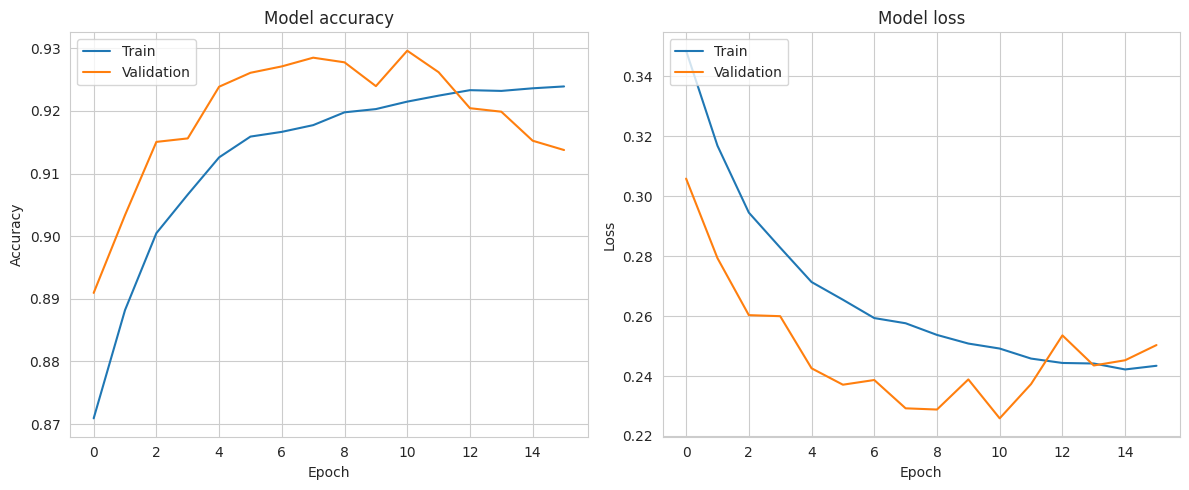

In [22]:
plot_training_history(history)

In [23]:
model.save('nn1_model.keras')

In [24]:
with open('nn1_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [25]:
with open('nn1_report.pkl', 'wb') as file:
    pickle.dump(classification_report(y_test, y_pred, output_dict=True), file)

In [26]:
# Assuming y_test is the true labels and y_pred is the predicted labels
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Оцінка моделі на тестових даних
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Full Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
Accuracy: 0.9240
Recall: 0.9290
Precision: 0.9349
F1 Score: 0.9319

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      4743
           1       0.93      0.93      0.93      6041

    accuracy                           0.92     10784
   macro avg       0.92      0.92      0.92     10784
weighted avg       0.92      0.92      0.92     10784

